# Signal processing course 2018/2019-1 @ ELTE
# Assignment 3
## 10.08.2018

## Task 1

### Low-pass filter (LPF) and the Bode plot

A low-pass filter (LPF) is a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency. The exact frequency response of the filter depends on the filter design.[\[1\]](https://en.wikipedia.org/wiki/Low-pass_filter)
We can construct a wingle pole LPF, simplest way as shown in the first picture:

![Low-pass filter](img\low-pass_filter_RC.svg "First order low-pass filter")

This simple LPF circuit consists of a resistor in series with a load, and a capacitor in parallel with the load. The capacitor exhibits reactance, and blocks low-frequency signals, forcing them through the load instead. At higher frequencies the reactance drops, and the capacitor effectively functions as a short circuit. The combination of resistance and capacitance gives the time constant of the filter $\tau = RC$, where in SI, $R$ is measured in Ohms ($\Omega$) and $C$ is measured in Farads ($F$).[\[2\]](https://www.allaboutcircuits.com/textbook/direct-current/chpt-16/voltage-current-calculations/). The *break frequency*, also called the *turnover frequency* or *cutoff frequency* (in Hz), is determined by the time constant:

$$
f_{c} = \frac{1}{2 \pi} \omega_{c} = \frac{1}{2 \pi} \frac{1}{\tau} = \frac{1}{2 \pi} \frac{1}{RC}
$$

This circuit may be understood by considering the time the capacitor needs to charge or discharge through the resistor:

* At low frequencies, there is plenty of time for the capacitor to charge up to practically the same voltage as the input voltage.
* At high frequencies, the capacitor only has time to charge up a small amount before the input switches direction. The output goes up and down only a small fraction of the amount the input goes up and down. At double the frequency, there's only time for it to charge up half the amount.

Another way to understand this circuit is through the concept of reactance at a particular frequency:

* Since direct current (DC) cannot flow through the capacitor, DC input must flow out the path marked $V_{out}$ (analogous to removing the capacitor).
* Since alternating current (AC) flows very well through the capacitor, almost as well as it flows through solid wire, AC input flows out through the capacitor, effectively short circuiting to ground (analogous to replacing the capacitor with just a wire).

The capacitor is not an "on/off" object (like the block or pass fluidic explanation above). The capacitor variably acts between these two extremes. It is the *Bode plot* and frequency response that show this variability, which is as follows:

![Bode of LPF](img\lpf_bode.png "Bode plot of a first-order (one-pole) low-pass filter")

The Bode plot for a linear, time-invariant system with transfer function $H(s)$ ($s$ being the complex frequency in the Laplace domain) consists of a magnitude plot and a phase plot.[\[3\]](https://en.wikipedia.org/wiki/Bode_plot)

The *Bode magnitude plot* is the graph of the function $\left| H(s = j \omega) \right|$ of frequency $\omega$. The $\omega$-axis of the magnitude plot is logarithmic and the magnitude is given in decibels, i.e., a value for the magnitude $\left| H \right|$ is plotted on the axis at $20 \log_{10} \left| H \right|$.

The *Bode phase plot* is the graph of the Argument (complex analysis)|phase, commonly expressed in degrees, of the transfer function $ \arg \left( H(s = j \omega) \right)$ as a function of $\omega$. The phase is plotted on the same logarithmic $\omega$-axis as the magnitude plot, but the value for the phase is plotted on a linear vertical axis.


For a simple, single pole LPF, this could be calculated as follows[\[4\]](https://slideplayer.com/slide/4225151/):

$$
H \left(j \omega \right) = \frac{1}{1 + j \omega RC} = \frac{1}{1 + j \omega \tau} = \frac{1}{1 + j \tfrac{\omega}{w_{c}}}
$$

We need the absolute (real) values of this function, thus:

$$
Re \left( H \left(j \omega \right) \right) = \frac{1}{\sqrt{1 + \left( \tfrac{\omega}{w_{c}} \right)^{2}}}
$$

At the last step we convert this to decibels:

$$
Re \left( H \left(j \omega \right) \right)_{dB} = 20 \cdot \log_{10} Re \left( H \left(j \omega \right) \right) = 20 \cdot \log_{10} \left( \frac{1}{\sqrt{1 + \left( \tfrac{\omega}{w_{c}} \right)^{2}}} \right)
$$

### Nyquist plot

A Nyquist plot is a parametric plot of a frequency response used in signal processing. The most common use of Nyquist plots is for assessing the stability of a system with feedback. In Cartesian coordinates, the real part of the transfer function is plotted on the X axis. The imaginary part is plotted on the Y axis. The frequency is swept as a parameter, resulting in a plot per frequency.[\[5\]](https://en.wikipedia.org/wiki/Nyquist_stability_criterion)
Summed, one can construct the Nyquist plot, using the transfer function $H \left(j \omega \right)$ plotting the following function:

$$
H_{Im} \left( H_{Re} \right)
$$

Where $H_{Re}$ is the argument of $H_{Im}$. It results in something, like the following plot:

![Nyquist of LPF](img\lpf_nyquist.svg "Nyquist plot of a first-order (one-pole) low-pass filter")

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cmath
from scipy import signal

In [90]:
sns.set()

### Constructing transfer function

In [627]:
def TransferFunction(w_max, tau):
    
    # Sampling rate: 1000 Hz
    SampRate = w * 1000
    freqs = np.linspace(0, w_max, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate, dtype=np.complex_)
    signal_bode = np.empty(SampRate)
    signal_arg = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        
        signal[i] = (1/(1 + 1j * (w_max/SampRate * i) * tau))

        signal_bode[i] = 20 * np.log10(signal[i].real)
        signal_arg[i] = np.degrees(cmath.phase(signal[i]))
        i += 1
    
    return(signal, signal_bode, signal_arg, freqs)

In [628]:
# Resistance's magnitude in the low-pass filter
# Measured in Ohm (greek Omega)
LPF_R = 1e+5

# Capacitor's magnitude on the low-pass filter
# Measured Farads (F)
LPF_C = 1e-05

# Time constant for LPF with given characteristics
tau = LPF_R * LPF_C

In [629]:
# Maximal frequency
w_max = 10

signal_trans, signal_bode, signal_arg, freqs = TransferFunction(w_max, tau)

### Bode diagram

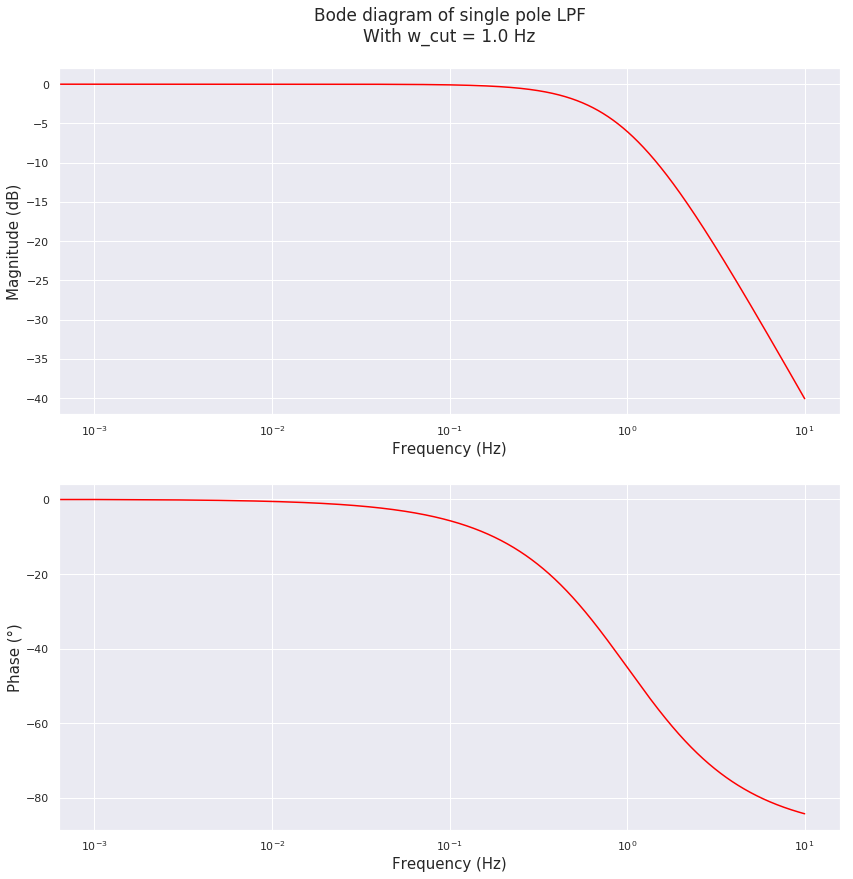

In [630]:
fig_1_bode, axes_1_bode = plt.subplots(nrows=2, ncols = 1, figsize=(14,14))

axes_1_bode[0].set_title("Bode diagram of single pole LPF\nWith w_cut = "+ str(1/tau) +" Hz\n", fontsize=17)

axes_1_bode[0].plot(freqs, signal_bode, c="red")
axes_1_bode[1].plot(freqs, signal_arg, c="red")

axes_1_bode[0].set_xscale("log")
axes_1_bode[1].set_xscale("log")

axes_1_bode[0].set_xlabel("Frequency (Hz)", fontsize=15)
axes_1_bode[0].set_ylabel("Magnitude (dB)", fontsize=15)

axes_1_bode[1].set_xlabel("Frequency (Hz)", fontsize=15)
axes_1_bode[1].set_ylabel("Phase (°)", fontsize=15)

plt.show()

### Nyquist plot

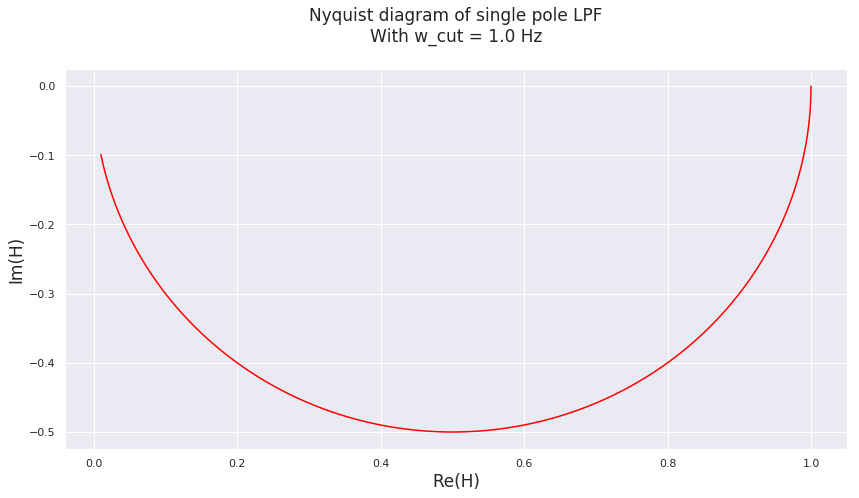

In [631]:
fig_1_nyquist, axes_1_nyquist = plt.subplots(figsize=(14,7))

axes_1_nyquist.plot(signal_trans.real, signal_trans.imag, c="red")

axes_1_nyquist.set_title("Nyquist diagram of single pole LPF\nWith w_cut = "+ str(1/tau) +" Hz\n", fontsize=17)
axes_1_nyquist.set_xlabel("Re(H)", fontsize=17)
axes_1_nyquist.set_ylabel("Im(H)", fontsize=17)

plt.show()

### Filtering with LPF

#### Constructing low-pass filter

In [638]:
def LPF(t, tau, signal_in, order):
    
    # Sampling rate: 1000 Hz/seconds
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # Cut-off frequency of the filter
    w_cut = 1/tau
    
    # Normalize the frequency
    # From Shanon theoreom we must use a sampling frequency larger than the maximum
    # frequency you want to catch in the signal
    w = w_cut / ((SampRate / t) / 2)
    
    # Calculate coefficients for low-pass Butterworth filter
    b, a = signal.butter(order, w, 'low')
    
    lps_output = signal.lfilter(b, a, signal_in)
    
    return(lps_output, time)

#### Constructing high-pass filter

In [639]:
def HPF(t, tau, signal_in, order):
    
    # Sampling rate: 1000 Hz/seconds
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # Cut-off frequency of the filter
    w_cut = 1/tau
    
    # Normalize the frequency
    # From Shanon theoreom we must use a sampling frequency larger than the maximum
    # frequency you want to catch in the signal
    w = w_cut / ((SampRate / t) / 2)
    
    # Calculate coefficients for low-pass Butterworth filter
    b, a = signal.butter(order, w, 'high')
    
    hpf_output = signal.lfilter(b, a, signal_in)
    
    return(hpf_output, time)

#### Calculate Fourier components

In [461]:
def FourierCoeff(signal, t, N_max, Complex=False):
    
    '''
    Parameters
    ----------
    signal : the periodic function's value as an np.array
    t: an np.linsapce array of points of time, where the signal got evalueted
    N_max : the function will return the first N_max + 1 Fourier coefficients

    Returns
    -------
    if Complex == False, the function returns:

    a_0 : float
    a, b : np.float arrays describing respectively the cosine and sine coefficients

    =======
    if Complex == True, the function returns:

    c : 1-dimensional complex-valued np.array of size N+1
    '''

    # This function computes the one-dimensional n-point discrete Fourier Transform (DFT) 
    # of a real-valued array by means of an efficient algorithm called the Fast Fourier Transform (FFT)
    y = np.fft.rfft(signal) / t.size

    if(Complex):
        return(y)

    else:
        y *= 2
        return(y[0].real, y[1:-1].real, -y[1:-1].imag)

#### Reconstruct original function with Fourier coefficients

In [466]:
def FourierCalcReal(a_0, a, b, t, T, N_max):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    ReconstTime = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(SampRate)
    
    # Calculate f(t) values by f(t) ~= a_0/2 + {Sum}_k=1->N (a_k*cos(2*pi*kt/T) + b_k*sin(2*pi*kt/T))
    for dt in range(0,len(ReconstTime)):
        ReconstFunc[dt] = a_0/2
        
        for k in range(1,N_max):
            ReconstFunc[dt] += a[k-1] * np.cos(2 * np.pi * k * ReconstTime[dt] / T) + b[k-1] * np.sin(2 * np.pi * k * ReconstTime[dt] / T)

    return(ReconstFunc, ReconstTime)

In [614]:
def FourierCalcComplex(c, t, N_max):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    ReconstTime = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array to store the reconstructed function's values
    ReconstFunc = np.empty(SampRate, dtype=np.complex_)
    
    # Calculate f(t) values by f(t) ~= {Sum}_k=-N->N (c_k*e^(i*2*pi*kt/T))
    for dt in range(0,len(ReconstTime)):
        ReconstFunc[dt] = 0
        
        for k in range(0,N_max+1):
            ReconstFunc[dt] += c[k] * cmath.exp(1.0j * 2 * np.pi * k * ReconstTime[dt] / t)
        
        for k in range(1,N_max+1):
            ReconstFunc[dt] += np.conj(c[k]) * cmath.exp(1.0j * 2 * np.pi * (-k) * ReconstTime[dt] / t)

    return(ReconstFunc, ReconstTime)

#### Function 1 - Square wave

In [609]:
def f_1(t, width, T):
    '''
    Input parameters:
    
    't': time in seconds
    'tau': bandwidth
    'T': period of signal
    '''
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        if(((t/SampRate * i) % T) < width):
            signal[i] = 1
            i += 1
        else:
            signal[i] = 0
            i += 1

    return(time, signal)

#### Going through LPF

In [660]:
# Order if filter
order_1_lpf = 1

# length of signal in seconds
t_1_lpf = 16

width_1_lpf = 1
T_1_lpf = 5*tau

time_1_lpf, signal_in_1_lpf = f_1(t_1_lpf, width_1_lpf, T_1_lpf)
lpf_output_1, lpf_time_1 = LPF(t_1_lpf, tau, signal_in_1_lpf, order_1_lpf)

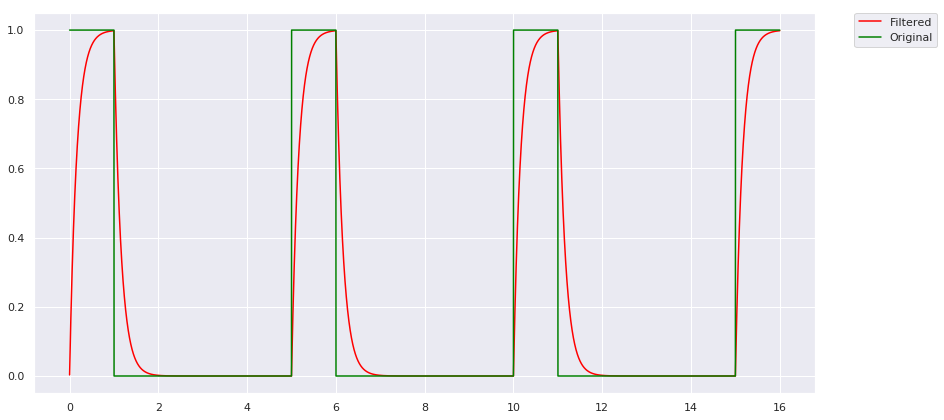

In [661]:
fig_1_lpf, axes_1_lpf = plt.subplots(figsize=(14,7))

axes_1_lpf.plot(lpf_time_1, lpf_output_1, c="red", label="Filtered")
axes_1_lpf.plot(time_1_lpf, signal_in_1_lpf, c="green", label="Original")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [662]:
N_max_1_lpf = 40

c_1_lpf = FourierCoeff(lpf_output_1, lpf_time_1, N_max_1_lpf, Complex=True)
ReconstFunc_1_Comp_lpf, ReconstTime_1_Comp_lpf = FourierCalcComplex(c_1_lpf, t_1_lpf, N_max_1_lpf)

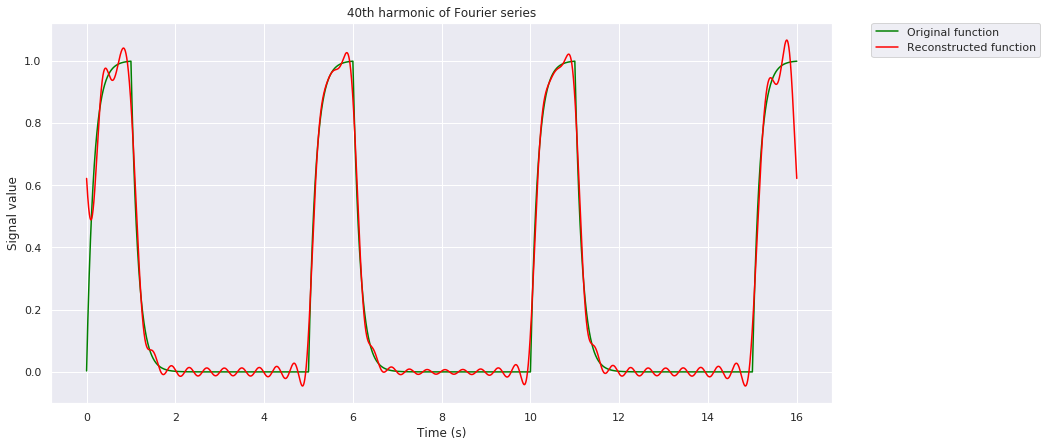

In [663]:
fig_f_1_Reconstruct_Complex_lpf = plt.figure(figsize=(14,7))

plt.plot(lpf_time_1, lpf_output_1, label="Original function", c="green")
plt.plot(ReconstTime_1_Comp_lpf, ReconstFunc_1_Comp_lpf.real, label="Reconstructed function", c="red")

plt.title(str(N_max_1_lpf) + "th harmonic of Fourier series")
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### Going through HPF

In [664]:
# Order if filter
order_1_hpf = 1

# length of signal in seconds
t_1_hpf = 10

width_1_hpf = 1
T_1_hpf = 2*tau

time_1_hpf, signal_in_1_hpf = f_1(t_1_hpf, width_1_hpf, T_1_hpf)
hpf_output_1, hpf_time_1 = HPF(t_1_hpf, tau, signal_in_1_hpf, order_1_hpf)

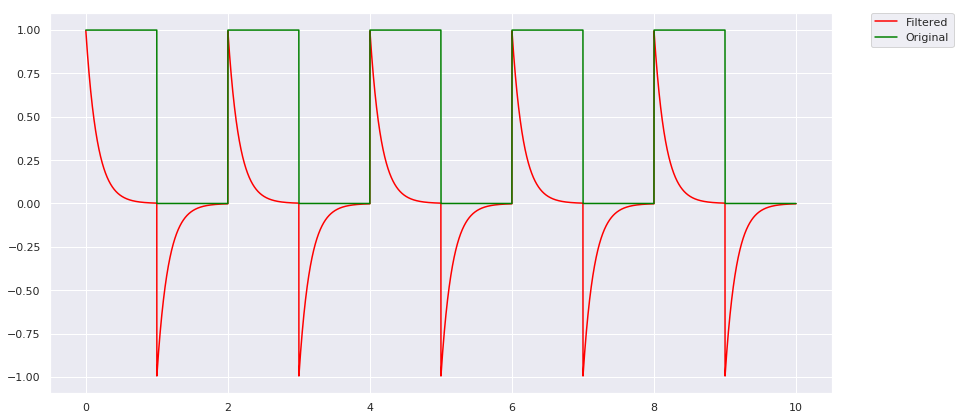

In [665]:
fig_1_hpf, axes_1_hpf = plt.subplots(figsize=(14,7))

axes_1_hpf.plot(hpf_time_1, hpf_output_1, c="red", label="Filtered")
axes_1_hpf.plot(time_1_hpf, signal_in_1_hpf, c="green", label="Original")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [666]:
N_max_1_hpf = 40

c_1_hpf = FourierCoeff(hpf_output_1, hpf_time_1, N_max_1_hpf, Complex=True)
ReconstFunc_1_Comp_hpf, ReconstTime_1_Comp_hpf = FourierCalcComplex(c_1_hpf, t_1_hpf, N_max_1_hpf)

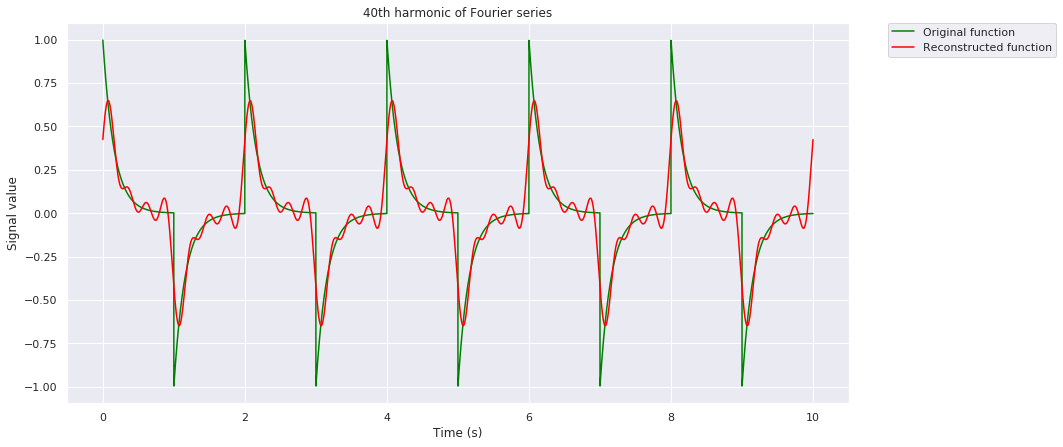

In [667]:
fig_f_1_Reconstruct_Complex_hpf = plt.figure(figsize=(14,7))

plt.plot(hpf_time_1, hpf_output_1, label="Original function", c="green")
plt.plot(ReconstTime_1_Comp_hpf, ReconstFunc_1_Comp_hpf.real, label="Reconstructed function", c="red")

plt.title(str(N_max_1_hpf) + "th harmonic of Fourier series")
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

### Some extra

#### Function 2 - Sawtooth wave

In [425]:
def f_2(t, h_max, T):
    '''
    Input parameters:
    
    't': time in seconds
    'h_max': maximum value of a 'tooth' 
    'T': period of signal
    '''
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = h_max * (((t/SampRate) * i) % T) / T
        i += 1
        
    return(time, signal)

In [426]:
# Order if filter
order_2 = 1

# length of signal in seconds
t_2 = 10

h_max_2 = 1
T_2 = 2

time_2, signal_in_2 = f_2(t_2, h_max_2, T_2)
lfp_output_2 = LFP(t_2, tau, signal_in_2, order_2)

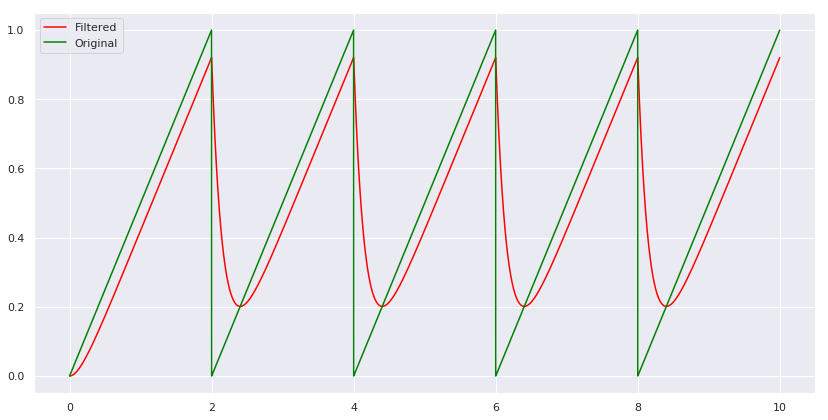

In [432]:
fig_2_lpf, axes_2_lpf = plt.subplots(figsize=(14,7))

axes_2_lpf.plot(time_2, lfp_output_2, c="red", label="Filtered")
axes_2_lpf.plot(time_2, signal_in_2, c="green", label="Original")

plt.legend()
plt.show()

#### Function 3

In [440]:
def f_3(t):
    '''
    Input parameter:
    
    't': time in seconds
    '''
    
    T = 2 * np.pi
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):

        if((t/SampRate * i) % T <= T/2):
            signal[i] = 2 * ((t/SampRate * i) % T)
            i += 1
            
        else:
            signal[i] = 2 * (T - ((t/SampRate * i) % T))
            i += 1
        
    return(time, signal)

In [441]:
# Order if filter
order_3 = 1

# length of signal in seconds
t_3 = 10

time_3, signal_in_3 = f_3(t_3)
lfp_output_3 = LFP(t_3, tau, signal_in_3, order_3)

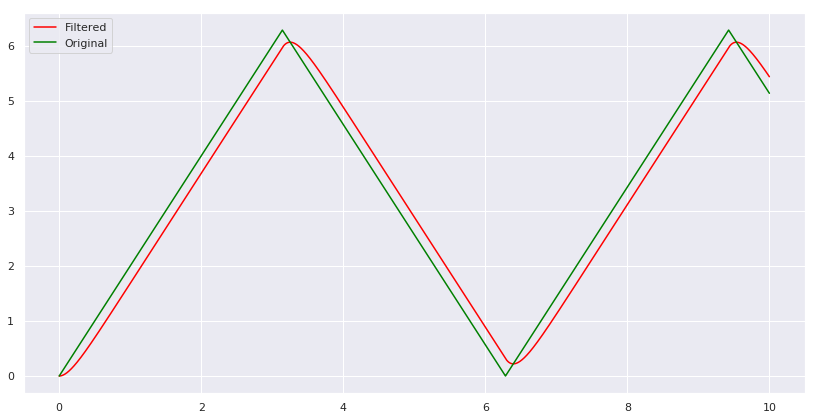

In [442]:
fig_3_lpf, axes_3_lpf = plt.subplots(figsize=(14,7))

axes_3_lpf.plot(time_3, lfp_output_3, c="red", label="Filtered")
axes_3_lpf.plot(time_3, signal_in_3, c="green", label="Original")

plt.legend()
plt.show()

#### Function 4

In [452]:
def f_4(t):
    '''
    Input parameter:
    
    't': time in seconds
    '''
    
    T = 2 * np.pi
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):

        if(((t/SampRate * i) % T) <= T/2):
            signal[i] = np.pi**2 - ((t/SampRate * i) % T)**2
            i += 1
        else:
            signal[i] = np.pi**2 - (T - ((t/SampRate * i) % T))**2
            i += 1

    return(time, signal)

In [453]:
# Order if filter
order_4 = 1

# length of signal in seconds
t_4 = 10

time_4, signal_in_4 = f_4(t_4)
lfp_output_4 = LFP(t_4, tau, signal_in_4, order_4)

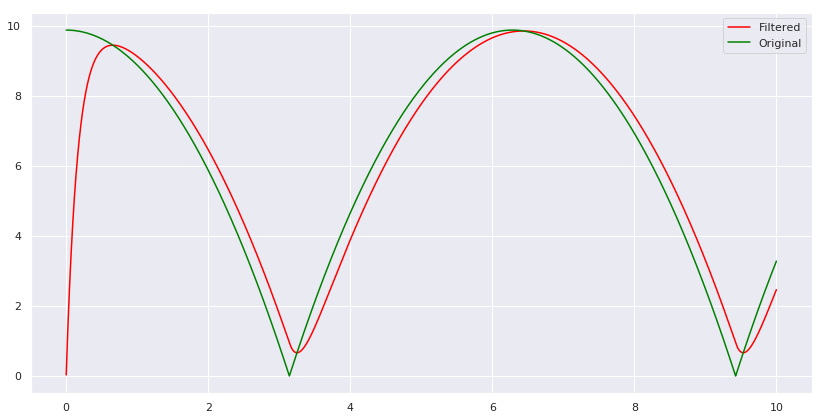

In [454]:
fig_4_lpf, axes_4_lpf = plt.subplots(figsize=(14,7))

axes_4_lpf.plot(time_4, lfp_output_4, c="red", label="Filtered")
axes_4_lpf.plot(time_4, signal_in_4, c="green", label="Original")

plt.legend()
plt.show()

## Task 2